In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [52]:
df = pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')

In [53]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [54]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [55]:
df.columns = ['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [56]:
df.drop(106,axis=0,inplace=True)

In [57]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [58]:
df.drop(105,axis=0,inplace=True)

In [59]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [60]:
df.isna().sum()

Month    0
Sales    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [62]:
df['Month'] = pd.to_datetime(df['Month'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [64]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [65]:
df.set_index('Month',inplace=True)

In [66]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


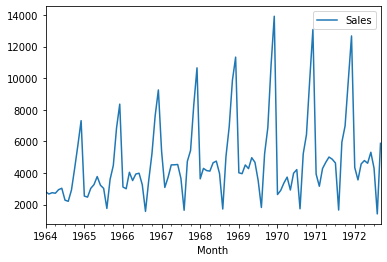

In [68]:
df.plot()

In [69]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [70]:
test_result=adfuller(df['Sales'])



In [76]:
def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
  

In [77]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276188
p-value : 0.363915771660247
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01    2815.0
1964-04-01    2672.0
1964-05-01    2755.0
               ...  
1972-05-01    4577.0
1972-06-01    4788.0
1972-07-01    4618.0
1972-08-01    5312.0
1972-09-01    4298.0
Name: Sales, Length: 105, dtype: float64

In [83]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)

In [84]:
df['Sales First Difference'] = df['Sales']-df['Sales'].shift(12)

In [85]:
df.head(15)

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [87]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


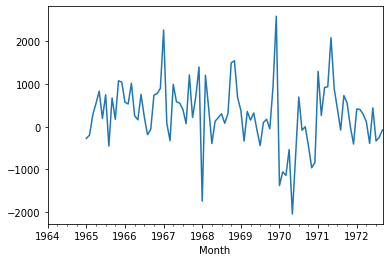

In [88]:
df['Sales First Difference'].plot()

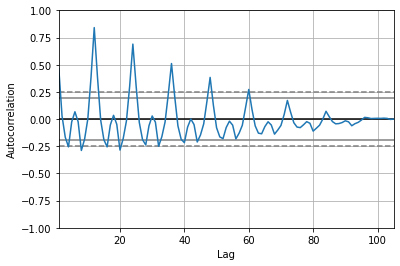

In [90]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

In [95]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

KeyError: ignored

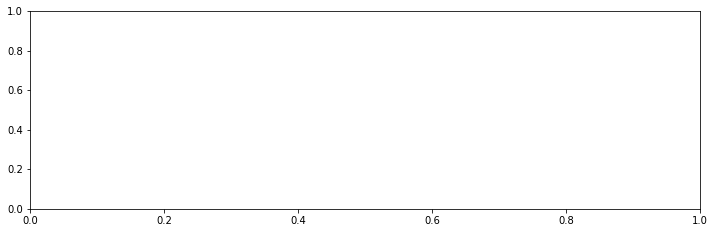

In [96]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


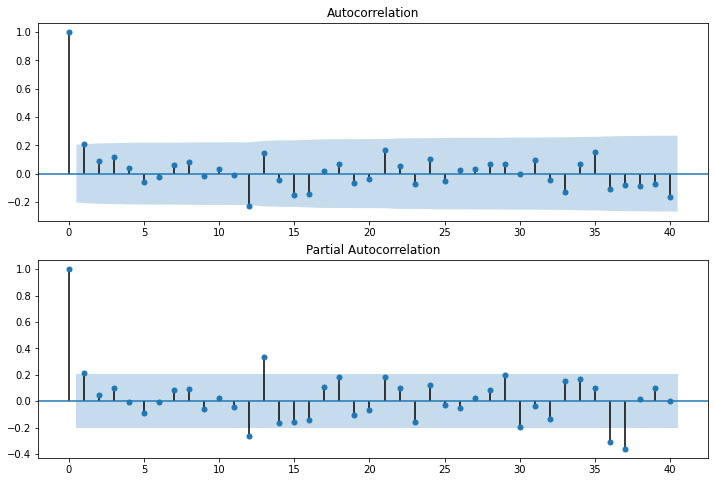

In [100]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax2)

In [103]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [104]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 20 Sep 2022   AIC                           1910.251
Time:                        10:31:55   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7854     12.405      1.837      0.066      -1.528      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

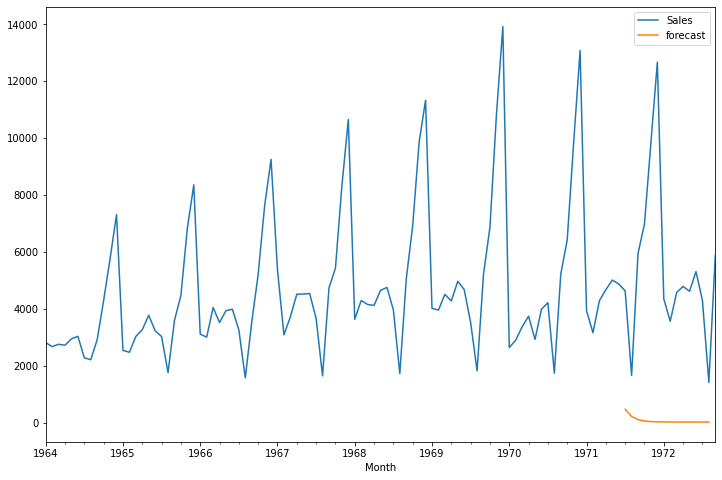

In [110]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))


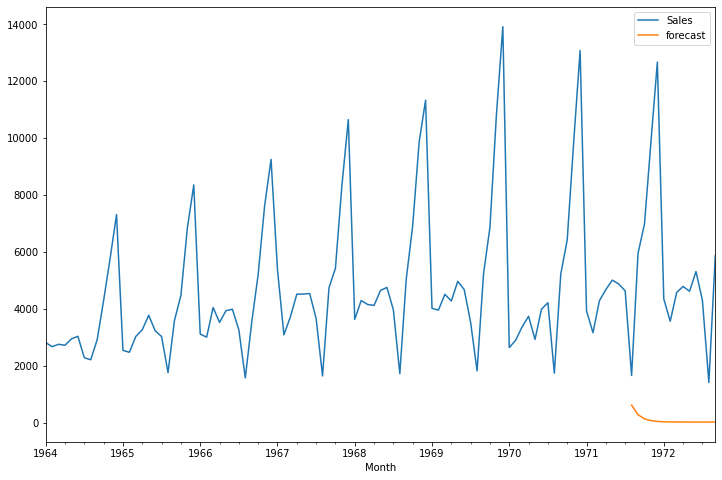

In [109]:
df['forecast'] = model_fit.predict(start=91,end=104,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

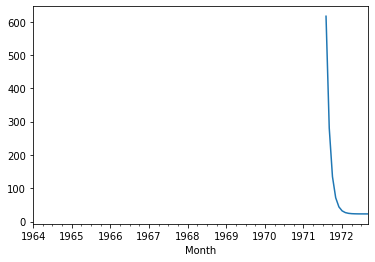

In [108]:
df['forecast'].plot()

In [111]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


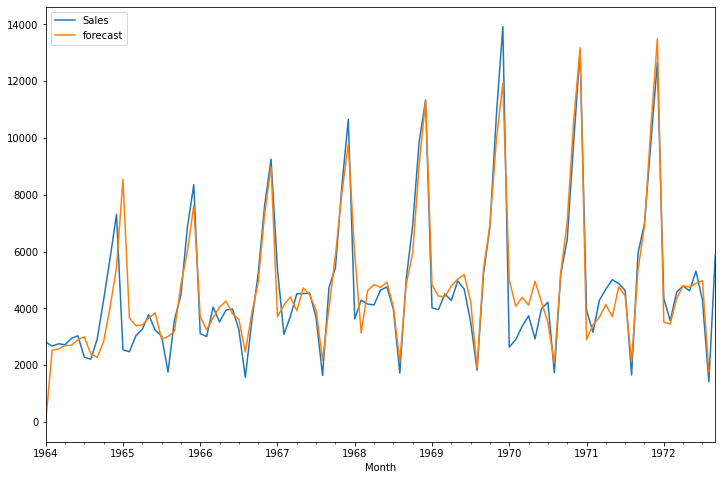

In [112]:
df['forecast'] = results.predict(statrt=90,end=103)
df[['Sales','forecast']].plot(figsize=(12,8))

In [113]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [115]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [116]:
future_datest_df.tail()

,Sales,Sales First Difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [117]:
future_df=pd.concat([df,future_datest_df])

In [118]:
future_df

,Sales,Sales First Difference,forecast
1964-01-01,2815.0,NaN,0.000000
1964-02-01,2672.0,NaN,2527.715862
1964-03-01,2755.0,NaN,2567.875784
1964-04-01,2721.0,NaN,2693.809898
1964-05-01,2946.0,NaN,2699.235548
...,...,...,...
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN


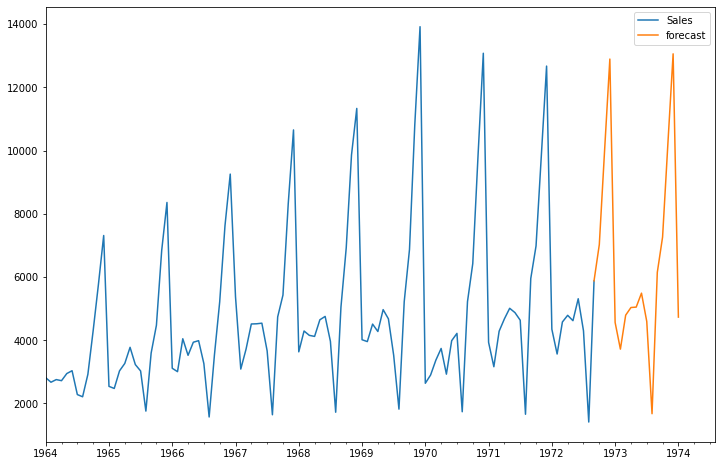

In [119]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 